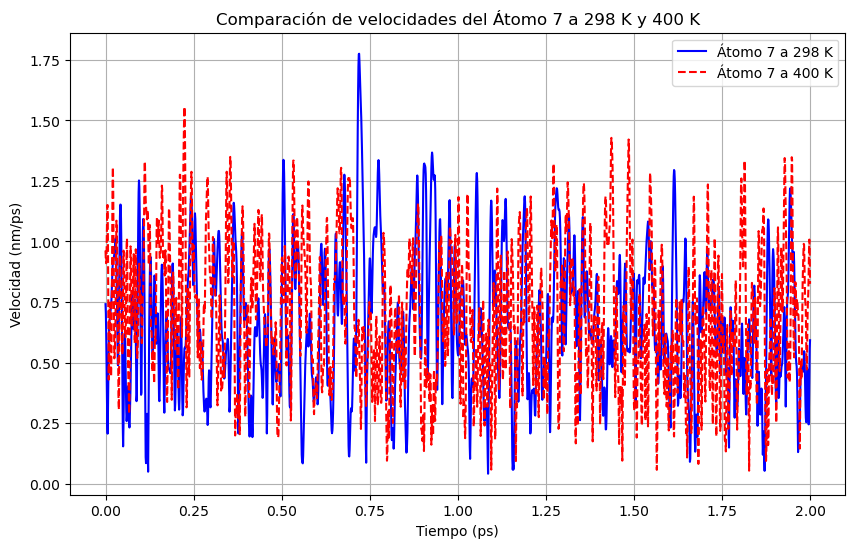

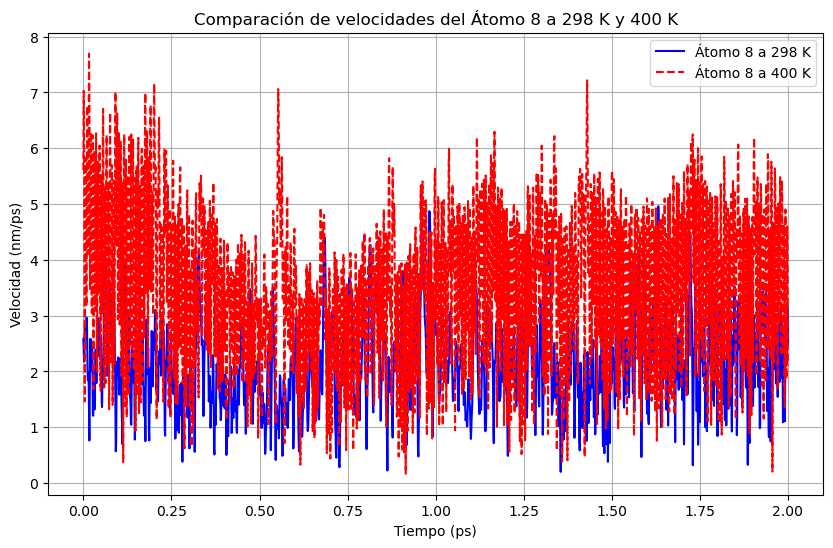

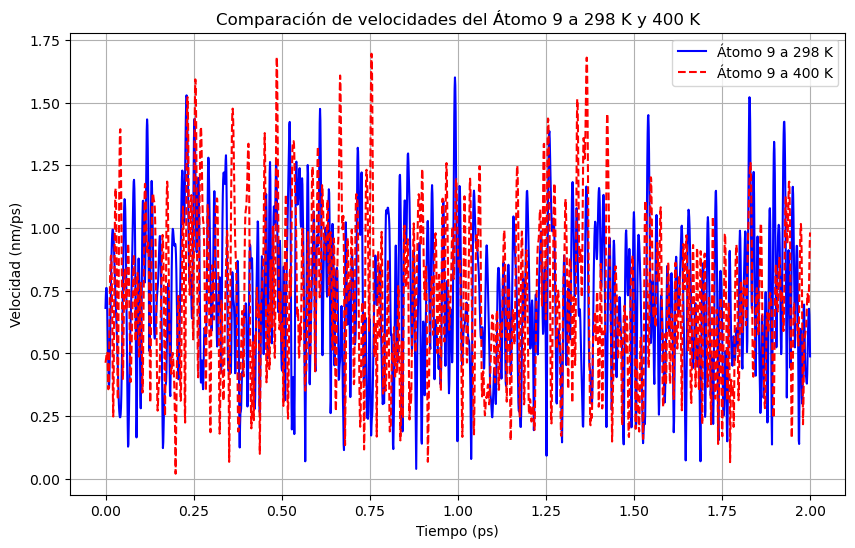

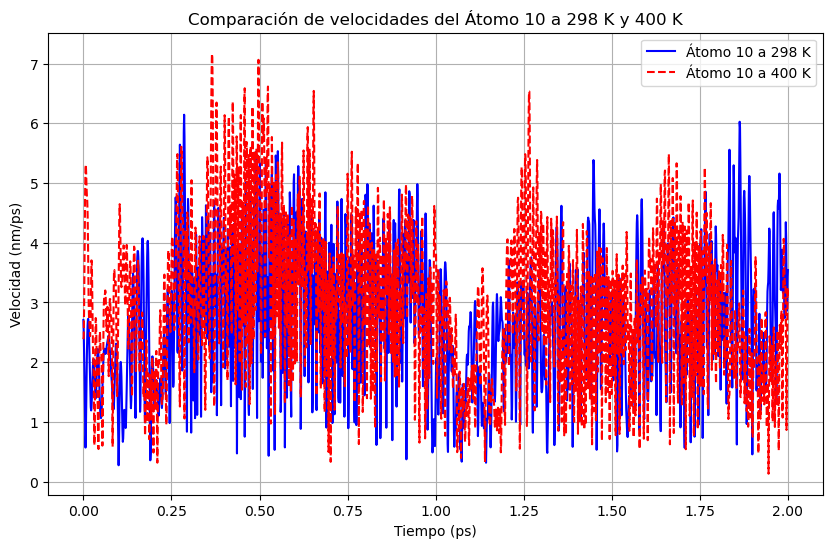

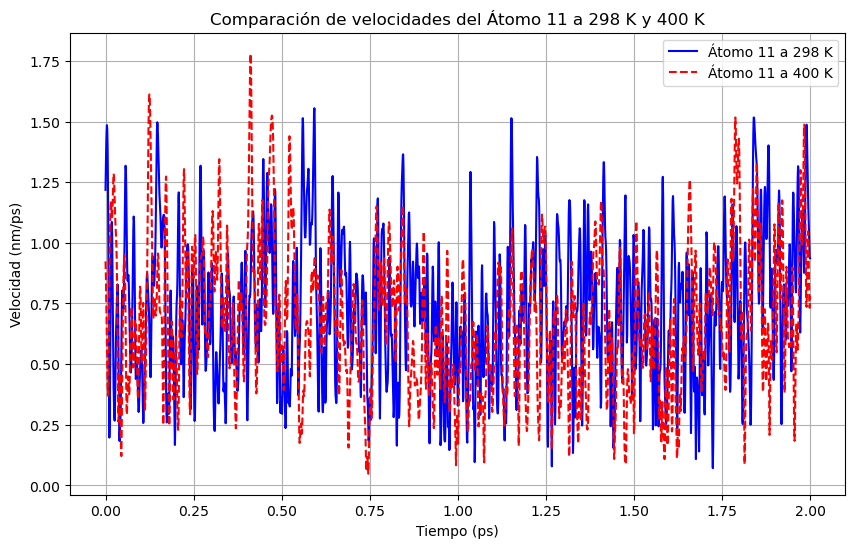

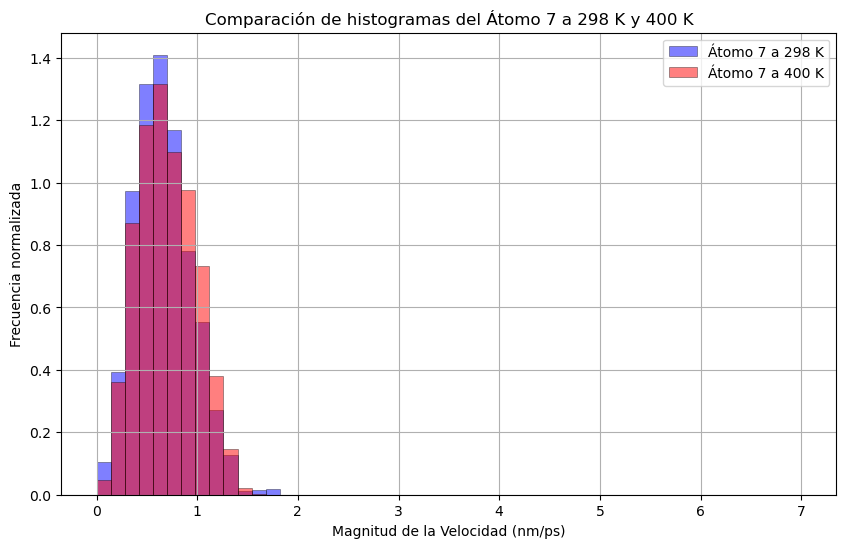

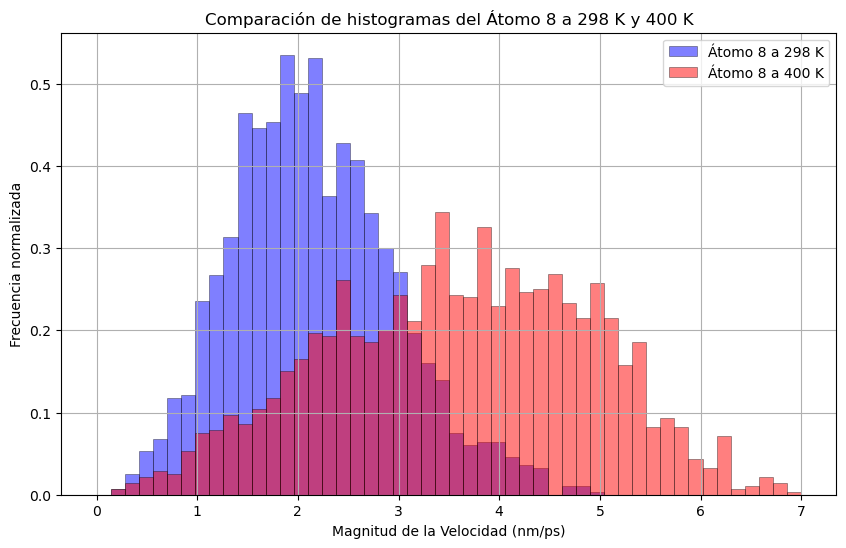

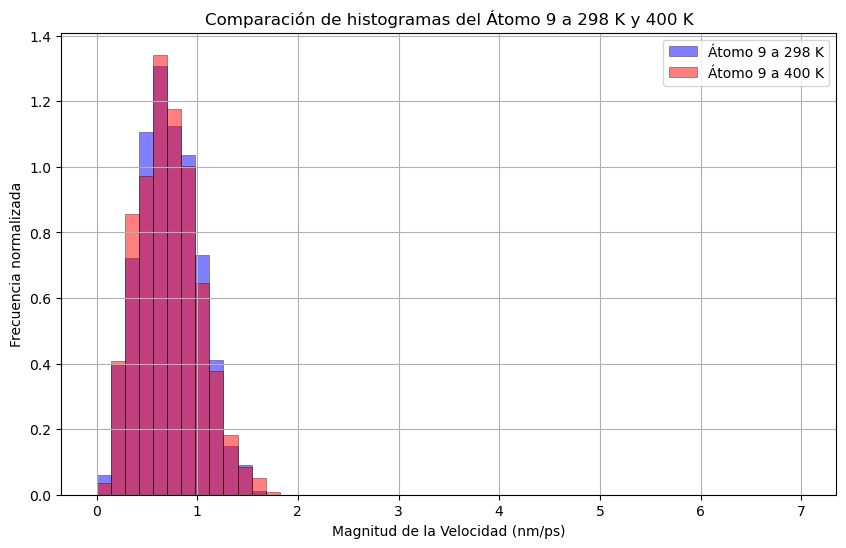

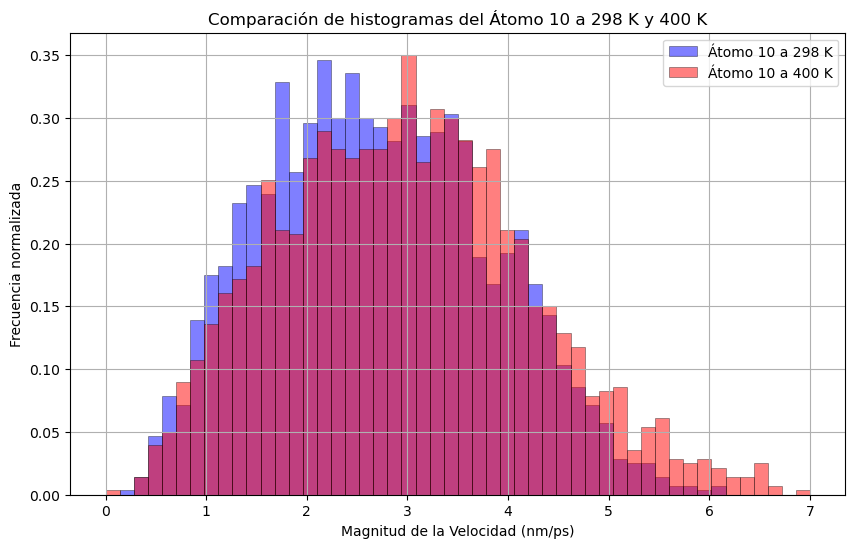

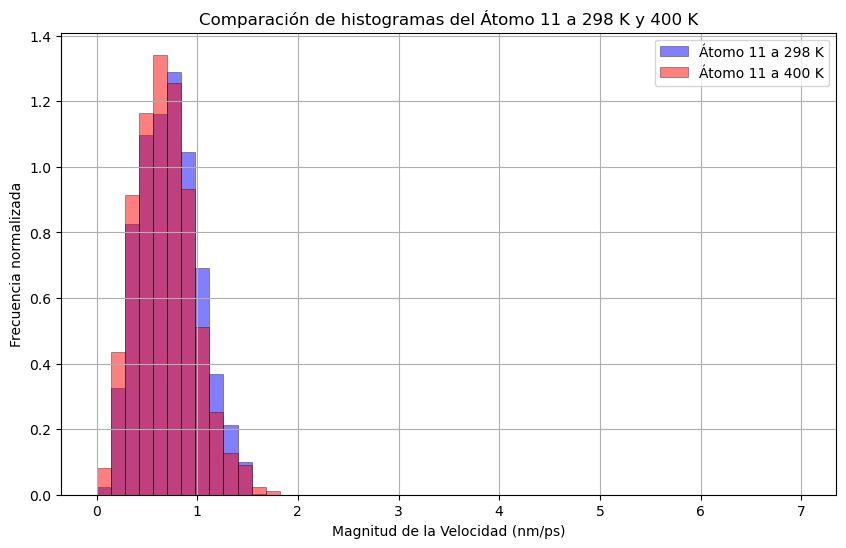

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os

def load_xvg(filename):
    """Carga los datos desde un archivo .xvg, ignorando comentarios."""
    if not os.path.exists(filename):
        print(f"Error: El archivo {filename} no existe.")
        return None
    
    data = []
    with open(filename, 'r') as f:
        for line in f:
            if line.strip() and not line.startswith(('@', '#')):
                data.append([float(x) for x in line.split()])
    return np.array(data)

def plot_velocity_comparison_per_atom(file1, temp1, file2, temp2, output_dir, start_atom=7, num_atoms=5):
    """Carga y grafica la comparación de velocidades para cada átomo individualmente a dos temperaturas en gráficos separados."""
    data1 = load_xvg(file1)
    data2 = load_xvg(file2)
    
    if data1 is None or data2 is None:
        print("Error al cargar los archivos. Verifica que existan y tengan datos válidos.")
        return
    
    time1 = data1[:, 0]  # Tiempo para la primera temperatura
    time2 = data2[:, 0]  # Tiempo para la segunda temperatura
    num_columns_per_atom = 4  # 3 para velocidad, 1 para vmag
    
    for i in range(num_atoms):
        atom_index = start_atom - 1 + i  # Ajuste para el primer átomo
        vmag_idx = 4 + atom_index * num_columns_per_atom  # Índice de la magnitud de velocidad
        
        vmag1 = data1[:, vmag_idx]
        vmag2 = data2[:, vmag_idx]
        
        plt.figure(figsize=(10, 6))
        plt.plot(time1, vmag1, label=f'Átomo {atom_index+1} a {temp1} K', color='blue', linestyle='-')
        plt.plot(time2, vmag2, label=f'Átomo {atom_index+1} a {temp2} K', color='red', linestyle='--')
        
        plt.xlabel('Tiempo (ps)')
        plt.ylabel('Velocidad (nm/ps)')
        plt.legend()
        plt.title(f'Comparación de velocidades del Átomo {atom_index+1} a {temp1} K y {temp2} K')
        plt.grid()
        plt.savefig(os.path.join(output_dir, f'velocidad_atom_{atom_index+1}.png'), dpi=300)
        plt.show()

def plot_histogram_comparison_per_atom(file1, temp1, file2, temp2, output_dir, start_atom=7, num_atoms=5, n_bins=50):
    """Genera histogramas comparando magnitud de velocidad para cada átomo individualmente a dos temperaturas en gráficos separados."""
    data1 = load_xvg(file1)
    data2 = load_xvg(file2)
    
    if data1 is None or data2 is None:
        print("Error al cargar los archivos. Verifica que existan y tengan datos válidos.")
        return
    
    num_columns_per_atom = 4  # 3 para velocidad, 1 para vmag
    v_min, v_max = 0, 7  # La velocidad no puede ser negativa
    
    for i in range(num_atoms):
        atom_index = start_atom - 1 + i  # Ajuste para el primer átomo
        vmag_idx = 4 + atom_index * num_columns_per_atom  # Índice de la magnitud de velocidad
        
        vmag1 = data1[:, vmag_idx]
        vmag2 = data2[:, vmag_idx]
        
        plt.figure(figsize=(10, 6))
        plt.hist(vmag1, bins=n_bins, range=(v_min, v_max), color='blue', alpha=0.5, density=True, label=f'Átomo {atom_index+1} a {temp1} K', edgecolor='black', linewidth=0.5)
        plt.hist(vmag2, bins=n_bins, range=(v_min, v_max), color='red', alpha=0.5, density=True, label=f'Átomo {atom_index+1} a {temp2} K', edgecolor='black', linewidth=0.5)
        
        plt.xlabel("Magnitud de la Velocidad (nm/ps)")
        plt.ylabel("Frecuencia normalizada")
        plt.title(f'Comparación de histogramas del Átomo {atom_index+1} a {temp1} K y {temp2} K')
        plt.legend()
        plt.grid(True)
        plt.savefig(os.path.join(output_dir, f'histograma_atom_{atom_index+1}.png'), dpi=300)
        plt.show()

# Uso del script para comparar átomos 7-11 en dos temperaturas con gráficos separados
output_dir = "output_plots"
os.makedirs(output_dir, exist_ok=True)
plot_velocity_comparison_per_atom('veloc298.xvg', 298, 'veloc400.xvg', 400, output_dir, start_atom=7, num_atoms=5)
plot_histogram_comparison_per_atom('veloc298.xvg', 298, 'veloc400.xvg', 400, output_dir, start_atom=7, num_atoms=5)


